# Module 5 Dimension Reduction

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn import datasets

In [7]:
# Load Iris dataset
iris = datasets.load_iris()
X,y = iris.data,iris.target

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [22]:
pca.fit(X)
X_t= pca.transform(X)

# X_t= pca.fit_transform(X)

In [23]:
# X_t

In [24]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [25]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [26]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521])

## PCA on Clustering

In [27]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)
cluster.fit(X)

cluster2 = KMeans(n_clusters=3)
cluster2.fit(X_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
%matplotlib inline

Text(0.5, 1.0, 'PCA')

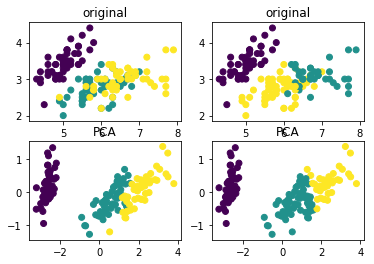

In [29]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('original')

plt.subplot(2,2,2)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)
plt.title('original')

plt.subplot(2,2,3)
plt.scatter(X_t[:,0],X_t[:,1],c=y)
plt.title('PCA')

plt.subplot(2,2,4)
plt.scatter(X_t[:,0],X_t[:,1],c=cluster2.labels_)
plt.title('PCA')


## PCA on Classification

In [43]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=33)

In [44]:
# KNN Classifier

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9555555555555556

In [45]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_t = pca.transform(X_train)
X_test_t = pca.transform(X_test)

In [46]:
# KNN Classifier

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_t,y_train)
clf.score(X_test_t,y_test)

0.9555555555555556

In [84]:
# import os
# os.environ['PATH'] += os.pathsep + '.....'

## Case Study: PCA on Classification

In [82]:
import pandas as pd
credit = pd.read_csv('data/credit.csv')

In [84]:
# credit.head()

In [50]:
credit.shape

(1000, 21)

In [85]:
y = credit['Creditability']
X = credit.drop(columns = ['Creditability'])

In [86]:
X.shape

(1000, 20)

In [73]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                 random_state=33)

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [88]:
X_t= pca.fit_transform(X)
pca.explained_variance_ratio_.cumsum()

array([0.99997019, 0.99998657, 0.99999754, 0.99999847, 0.99999881,
       0.99999901, 0.9999992 , 0.99999934, 0.99999948, 0.9999996 ,
       0.99999971, 0.99999977, 0.99999983, 0.99999988, 0.99999991,
       0.99999993, 0.99999996, 0.99999998, 1.        , 1.        ])

In [102]:
pca = PCA(n_components=15)
pca.fit(X_train)
X_train_t = pca.transform(X_train)
X_test_t = pca.transform(X_test)

In [103]:
# KNN Classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.672

In [104]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_t,y_train)
clf.score(X_test_t,y_test)

0.668

In [105]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 33)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.732

In [106]:
clf = RandomForestClassifier(random_state = 33)
clf.fit(X_train_t,y_train)
clf.score(X_test_t,y_test)

0.7

In [111]:
def experiment(clf):
    X_scores = []
    X_t_scores = []
    for i in range(1, 21):
        pca = PCA(n_components=i)
        pca.fit(X_train)
        X_train_t = pca.transform(X_train)
        X_test_t = pca.transform(X_test)
        
        clf.fit(X_train,y_train)
        X_scores.append(clf.score(X_test,y_test))
        
        clf.fit(X_train_t,y_train)
        X_t_scores.append(clf.score(X_test_t,y_test))
    
    plt.plot(range(1, 21),X_scores, label = 'Bef')
    plt.plot(range(1, 21),X_t_scores, label = 'Aft')
    plt.legend()
    plt.title('Scores Bef/Aft PCA for {}'.format(clf.__class__.__name__))
    plt.xlabel('No. of Components')
    plt.ylabel('Accuracy Score' )

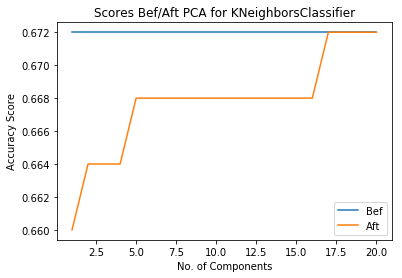

In [112]:
experiment(KNeighborsClassifier())

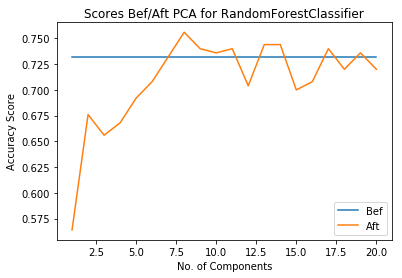

In [113]:
experiment(RandomForestClassifier(random_state = 33))

## GridSearch

In [21]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=100)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'min_samples_split':[8, 10], 
              'max_depth':[6,8, 10]}
gridsearcher = GridSearchCV(estimator = DecisionTreeClassifier(), 
                            param_grid = parameters, cv=5)
gridsearcher.fit(X_train,y_train)

/Users/anqitu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [8, 10], 'max_depth': [6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
gridsearcher.best_params_

{'max_depth': 6, 'min_samples_split': 10}

In [24]:
tree_clf = gridsearcher.best_estimator_